# Digit Recognizer

## Kaggle Competition Link

https://www.kaggle.com/competitions/digit-recognizer/overview

## Code

### Importing Libraries

In [2]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import fetch_openml

# perfromance metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# preprocessing
from sklearn.model_selection import train_test_split

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


### Loading the MNIST Dataset

In [3]:
# loading the training and testing data
mnist = pd.read_csv('train.csv')

# printing the first five rows of the training data
print(mnist.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

### Data Preprocessing

In [4]:
# check the shape of the dataset
print("Shape of the dataset: ", mnist.shape)

Shape of the dataset:  (42000, 785)


In [5]:
# splitting the dataset into dependent and independent variables
# X is the independent variable
# y is the dependent variable

X = mnist.drop('label', axis=1)
y = mnist['label']

# converting the dataset into numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [6]:
# scaling the data
X = X / 255.0

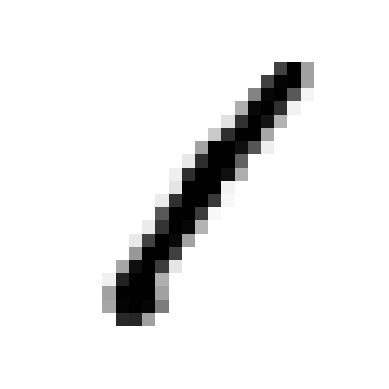

In [7]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

### Splitting the Dataset into Training and Testing Sets

In [8]:
# splitting the dataset into training and testing sets
# train_images is the training set for the images
# train_labels is the training set for the labels
# test_images is the testing set for the images
# test_labels is the testing set for the labels

train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and Evaluating the Model

#### KNN Algorithm

In [9]:
# training the classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_images, train_labels)

KNeighborsClassifier()

In [10]:
# testing the model
predicted_test_lables = knn_clf.predict(test_images)

In [11]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[812   0   0   0   0   0   4   0   0   0]
 [  0 906   0   0   0   0   3   0   0   0]
 [  6  15 796   3   2   2   1  20   1   0]
 [  2   4   4 900   0   9   1   6   5   6]
 [  1   5   0   0 811   0   3   1   0  18]
 [  1   2   0  15   1 669   9   0   1   4]
 [  5   0   0   0   0   3 777   0   0   0]
 [  0  18   2   0   1   0   0 857   0  15]
 [  1  12   2  12   3  15   4   1 777   8]
 [  3   3   1  10   6   1   0  12   2 800]]
Accuracy:  0.9648809523809524
Precision:  0.9656422580407042
Recall:  0.9647514944838347
F1 Score:  0.9649291494053396

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97    

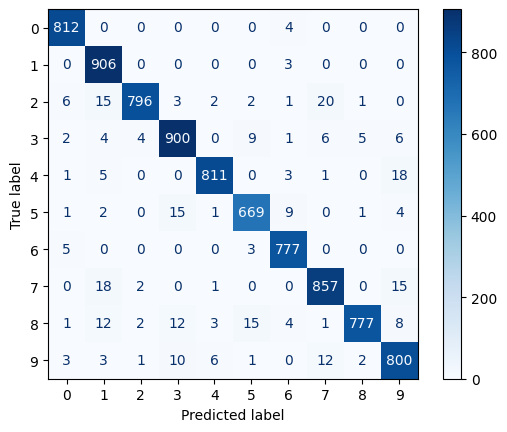

In [12]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### SVM Algorithm

In [13]:
# training the classifier
svm_clf = SVC()
svm_clf.fit(train_images, train_labels)

SVC()

In [14]:
# testing the model
predicted_test_lables = svm_clf.predict(test_images)

In [15]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[807   0   0   0   2   1   4   0   1   1]
 [  0 902   1   1   1   1   0   1   1   1]
 [  3   3 820   2   8   0   3   3   4   0]
 [  1   3   5 898   0   9   0   6  11   4]
 [  1   0   1   0 815   1   5   3   0  13]
 [  1   1   1   8   2 679   6   0   2   2]
 [  3   1   0   0   0   1 777   0   3   0]
 [  0   2   7   0   4   1   0 867   2  10]
 [  1   2   3   7   5   4   0   2 810   1]
 [  2   2   1  10  10   1   0   7   3 802]]
Accuracy:  0.973452380952381
Precision:  0.973416373747596
Recall:  0.9735339772335252
F1 Score:  0.9734602615363983

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.97      0.96      0.96       937
           4       0.96      0.97      0.97       839
           5       0.97      0.97      0.97       702
           6       0.98      

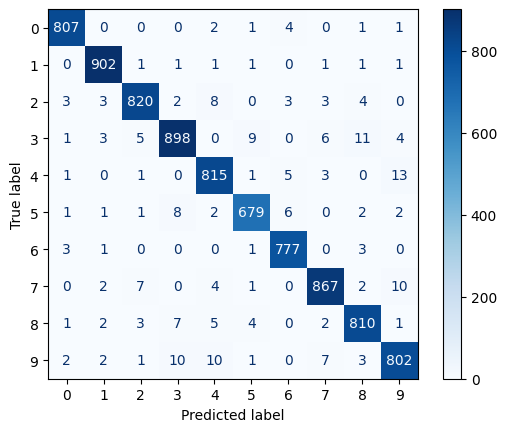

In [16]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### Logistic Regression Algorithm

In [17]:
# training the classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(train_images, train_labels)

RandomForestClassifier()

In [18]:
# testing the model
predicted_test_lables = rf_clf.predict(test_images)

In [19]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[804   0   1   0   1   0   6   0   3   1]
 [  0 901   3   0   1   1   1   1   0   1]
 [  3   5 812   2   9   0   5   4   6   0]
 [  2   0   7 882   2  14   0   8  10  12]
 [  1   0   1   0 815   0   6   2   0  14]
 [  1   1   2  11   1 668   7   1   6   4]
 [  2   1   0   0   2   3 773   0   4   0]
 [  0   3  11   2   5   0   0 851   2  19]
 [  1   4   4   8   4   3   4   2 798   7]
 [  3   4   2  13  10   3   0   7   5 791]]
Accuracy:  0.9636904761904762
Precision:  0.9636474407304367
Recall:  0.9637851213753328
F1 Score:  0.9636699001787662

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.97       839
           5       0.97      0.95      0.96       702
           6       0.96    

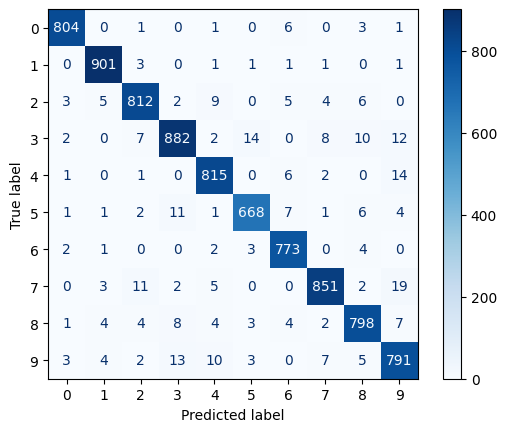

In [20]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### Naive Bayes Algorithm

In [21]:
# training the classifier
nb_clf = GaussianNB()
nb_clf.fit(train_images, train_labels)

GaussianNB()

In [22]:
# testing the model
predicted_test_lables = nb_clf.predict(test_images)

In [23]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[729   1   2   3   0   3  44   0  21  13]
 [  1 869   5   2   0   0   8   0  13  11]
 [ 79  28 211  96   4   7 231   3 180   7]
 [ 44  66   2 384   0   4  67   8 286  76]
 [ 24   8   8   4 144   6  90   4 138 413]
 [ 76  23   4  20   3  66  54   1 388  67]
 [  8  12   1   1   0   3 749   0  10   1]
 [  4   9   0  17  12   4   1 301  21 524]
 [ 16 133   2   6   3   7  17   2 515 134]
 [  7  13   0   1   4   1   2  12  13 785]]
Accuracy:  0.5658333333333333
Precision:  0.681702868786601
Recall:  0.5618982336673111
F1 Score:  0.5205824089118253

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       816
           1       0.75      0.96      0.84       909
           2       0.90      0.25      0.39       846
           3       0.72      0.41      0.52       937
           4       0.85      0.17      0.29       839
           5       0.65      0.09      0.16       702
           6       0.59     

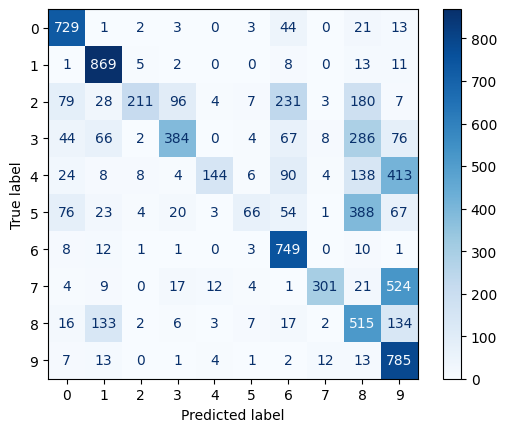

In [24]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


#### Random Forest Algorithm

In [25]:
# training the classifier
lr_clf = LogisticRegression()
lr_clf.fit(train_images, train_labels)

C:\Users\mainp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# testing the model
predicted_test_lables = lr_clf.predict(test_images)

In [27]:
# evaluating the model

# confusion matrix
print("Confusion Matrix: ")
print(confusion_matrix(test_labels, predicted_test_lables))

# accuracy of the model
accuracy = accuracy_score(test_labels, predicted_test_lables)
print("Accuracy: ", accuracy)

# precision of the model
precision = precision_score(test_labels, predicted_test_lables, average='macro')
print("Precision: ", precision)

# recall of the model
recall = recall_score(test_labels, predicted_test_lables, average='macro')
print("Recall: ", recall)

# f1 score of the model
f1 = f1_score(test_labels, predicted_test_lables, average='macro')
print("F1 Score: ", f1)

# classification report
print("\nClassification Report: ")
print(classification_report(test_labels, predicted_test_lables))

Confusion Matrix: 
[[789   0   1   1   3  13   7   0   2   0]
 [  0 888   4   0   1   4   1   2   7   2]
 [  4  11 762  11  13   7  11   8  18   1]
 [  1   3  25 828   0  33   2   7  23  15]
 [  3   2   4   1 787   2   9   4   4  23]
 [  8   2   6  22   8 621  18   3  11   3]
 [  7   1   6   0   4   8 754   1   3   1]
 [  0   2  10   7  11   4   0 825   3  31]
 [  3  12   6  29   7  27   6   4 736   5]
 [  6   4   3  13  18   5   0  30   7 752]]
Accuracy:  0.9216666666666666
Precision:  0.9205128510388922
Recall:  0.9214000369625719
F1 Score:  0.9208564051102736

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.96      0.98      0.97       909
           2       0.92      0.90      0.91       846
           3       0.91      0.88      0.90       937
           4       0.92      0.94      0.93       839
           5       0.86      0.88      0.87       702
           6       0.93    

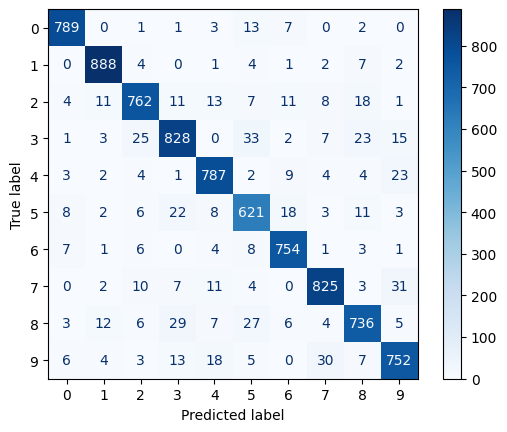

In [28]:
# printing the colored confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_labels, predicted_test_lables), display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)


## Predicting the Test Set Results and Creating the Submission File Using the Best Model

In [29]:
# loading the test dataset
mnist_test = pd.read_csv('test.csv')

# converting the dataset into numpy arrays
mnist_test = mnist_test.to_numpy()

# scaling the data
mnist_test = mnist_test / 255.0

In [30]:
# using the SVM classifier to predict the labels of the test data
predicted_test_labels = svm_clf.predict(mnist_test)

In [31]:
# creating a dataframe to store the predicted labels
predicted_test_labels = pd.DataFrame(predicted_test_labels)

# adding the image id column to the dataframe
predicted_test_labels['ImageId'] = range(1, len(predicted_test_labels) + 1)

# renaming the columns of the dataframe
predicted_test_labels.columns = ['Label', 'ImageId']

# rearranging the columns of the dataframe
predicted_test_labels = predicted_test_labels[['ImageId', 'Label']]

# saving the dataframe as a csv file
predicted_test_labels.to_csv('predicted_test_labels.csv', index=False)
